In [116]:
from google.colab import drive
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import csv

In [117]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
with open('/content/drive/My Drive/RUG/data_clustering.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
data_array = np.array(data, dtype=float)

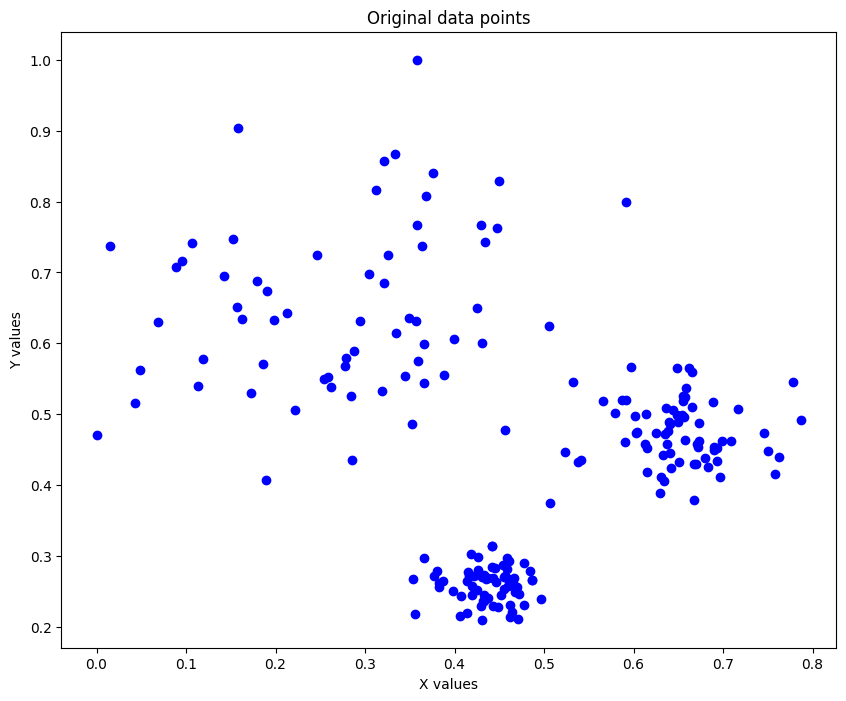

In [119]:
# visualize data
fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot()
plot.scatter(data_array[:,0],data_array[:,1], c="blue", marker='o', label='Data Points')
plot.set_xlabel('X values')
plot.set_ylabel('Y values')
plot.set_title('Original data points')
plt.show()

In [7]:
# show file contents
!cat ./drive/MyDrive/RUG/data_clustering.csv | head

0.32090430934665926,0.8572882283668262
0.119262314052953,0.5777166416197385
0.10684087406768455,0.7418910976942216
0.45444762940979105,0.28754424614274443
0.44867379605213037,0.22753405529728424
0.15201127863227806,0.7467463137487926
0.6149140418627035,0.41799262281699684
0.4721947662187688,0.2461298307352894
0.6699493143254428,0.42967709562071554
0.42485312416848975,0.6499243122793389


In [120]:
# --- program complete ---

def main(inp_m, k):
  # distance matrix
  dist = pdist(data_array,'euclidean')
  # linkage matrix
  method = methods[inp_m]
  link = linkage(dist,method=method,metric='euclidean')

  # draw dendrogram

  plt.figure(figsize=(8, 6))
  dendrogram(link, color_threshold=0, above_threshold_color='k', no_labels=True)
  plt.axhline(y=link[-k + 1, 2], c='r', linestyle='--', label=f'Cut-off {k} clusters')
  plt.title(f'Dendrogram for {method} linkage')
  plt.xlabel('Leaf clusters')
  plt.ylabel('Distance')
  plt.legend(loc='upper right')
  plt.show()

  # find labels of k clusters
  label = fcluster(link,t=k)

  # plot cluster
  plt.scatter(data_array[:, 0], data_array[:, 1],c=label, cmap='viridis')
  plt.title(f"Clustered Data Points using {method} and K={k}")
  plt.show()

  # find silhouette score
  silhouette_avg = silhouette_score(data_array, label)
  print(silhouette_avg)

In [111]:

# read data
with open('/content/drive/My Drive/RUG/data_clustering.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
data_array = np.array(data, dtype=float)

# choose method
methods = {0: 'single', 1: 'average', 2: 'complete', 3: 'ward'}

inp_m = int(input(f"Please choose a method: {methods}:  "))

# choose number of cluster
k = int(input(f"Please specify number of cluster:  "))

# main(inp_m, k)

Please choose a method: {0: 'single', 1: 'average', 2: 'complete', 3: 'ward'}:  2
Please specify number of cluster:  0


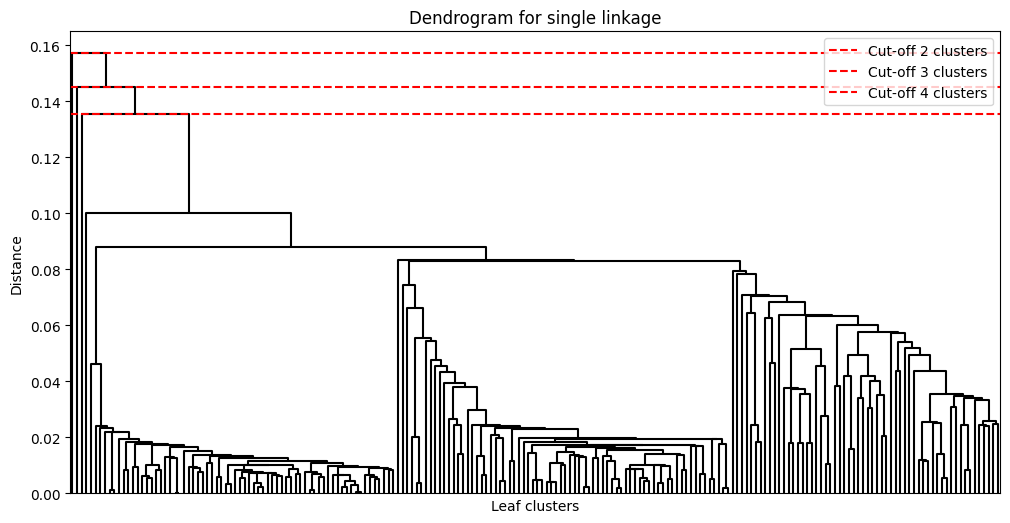

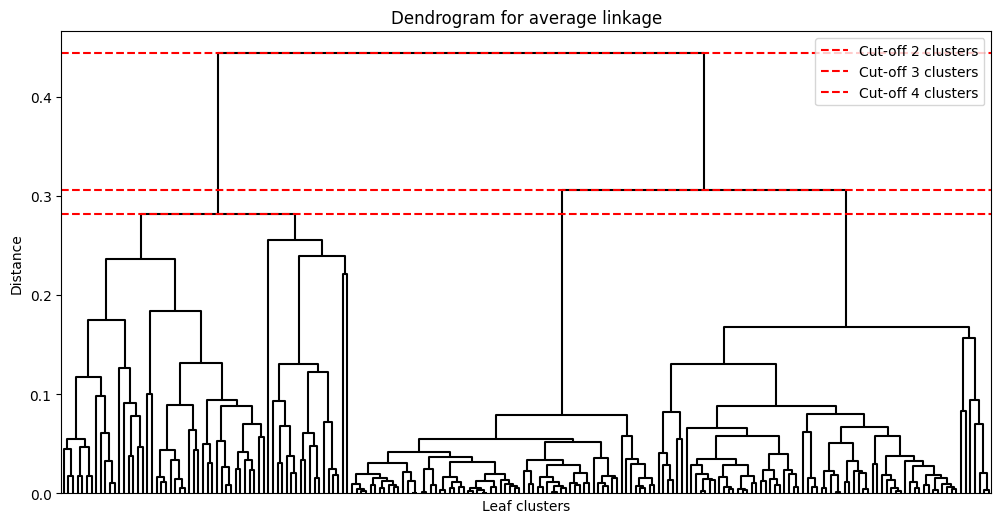

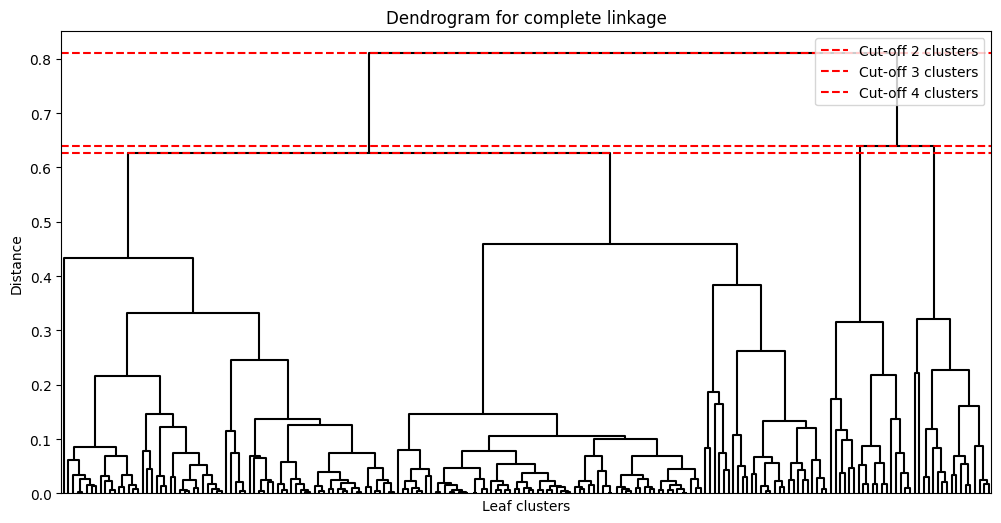

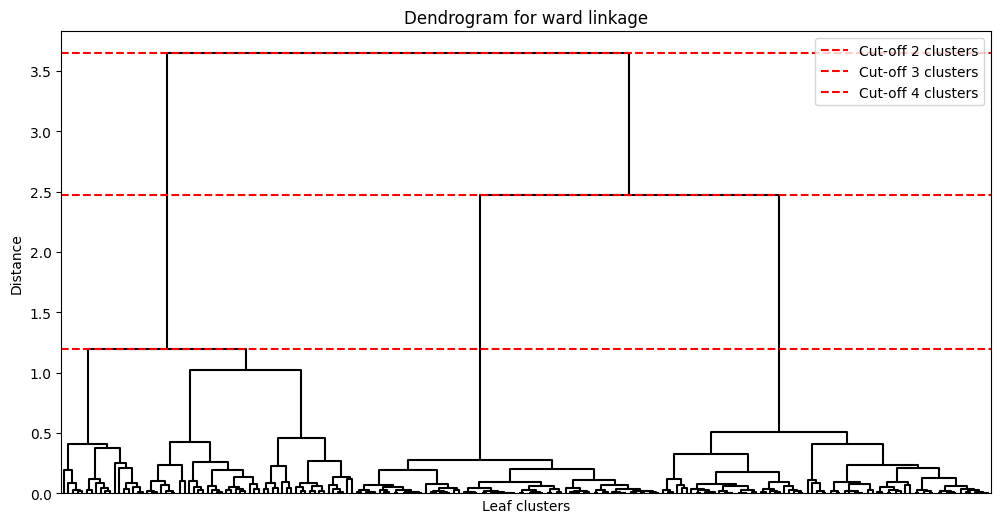

In [121]:
# generate the dendrograms with cluster cutoff thresholds
methods = ['single','average', 'complete','ward']
Ks = [2,3,4]
for m in methods:
  # distance matrix
  dist = pdist(data_array,'euclidean')
  # linkage matrix
  link = linkage(dist,method=m,metric='euclidean')

  plt.figure(figsize=(12, 6))
  dendrogram(link, color_threshold=0, above_threshold_color='k', no_labels=True)
  # draw thresholds
  for k in Ks:
    plt.axhline(y=link[-k + 1, 2], c='r', linestyle='--', label=f'Cut-off {k} clusters')

  plt.title(f'Dendrogram for {m} linkage')
  plt.xlabel('Leaf clusters')
  plt.ylabel('Distance')
  plt.legend(loc='upper right')
  plt.show()



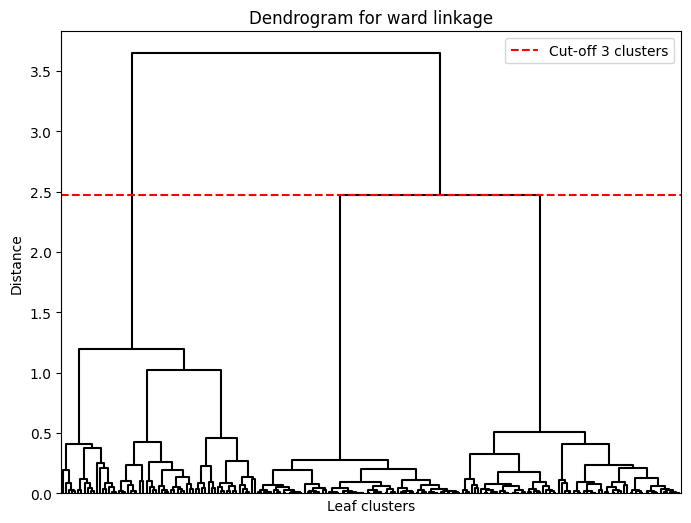

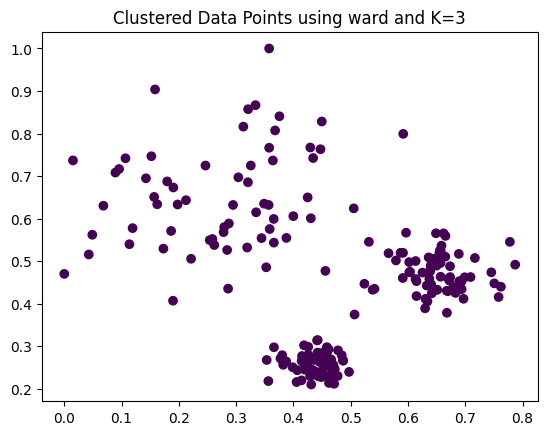

TypeError: ignored

In [114]:
inp_m = 3
k=3
main(inp_m, k)

In [136]:
# generate cluster visualization and return table of silhouette scores
def clusters(m, k):
  #find distance matrix
  dist = pdist(data_array,'euclidean')
  #find linkage matrix
  link = linkage(dist,method=m,metric='euclidean')
  #find labels of k clusters
  clusterLabels = fcluster(link, k, criterion='maxclust')
  # plot cluster
  plt.scatter(data_array[:, 0], data_array[:, 1],c=clusterLabels, cmap='viridis')
  plt.title(f"Clustered data points using {m} and K={k}")
  plt.savefig(f"/content/drive/MyDrive/RUG/AS2-clusterimages/cluster_{m}_{k}.png")
  plt.show()

  # find silhouette score
  silhouette_avg = silhouette_score(data_array, clusterLabels)
  print(silhouette_avg)
  return silhouette_avg

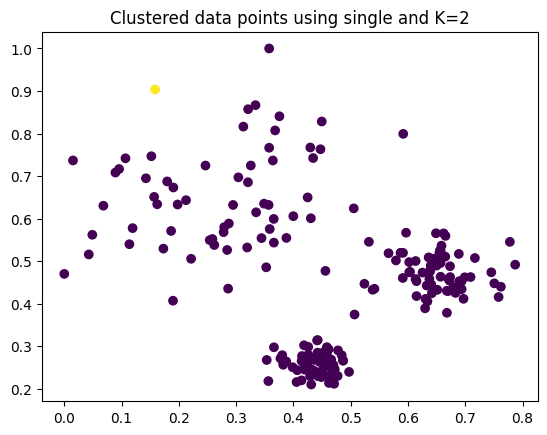

0.3773294375309513


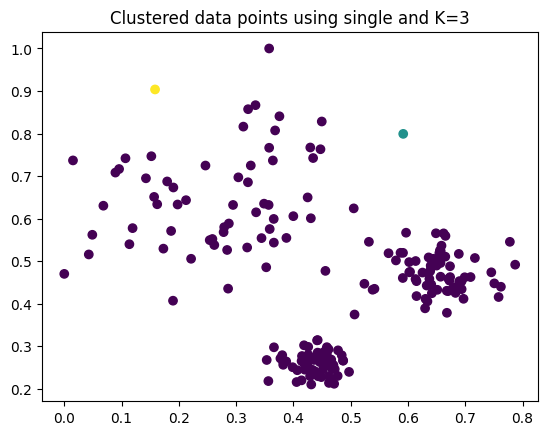

0.18045986668287203


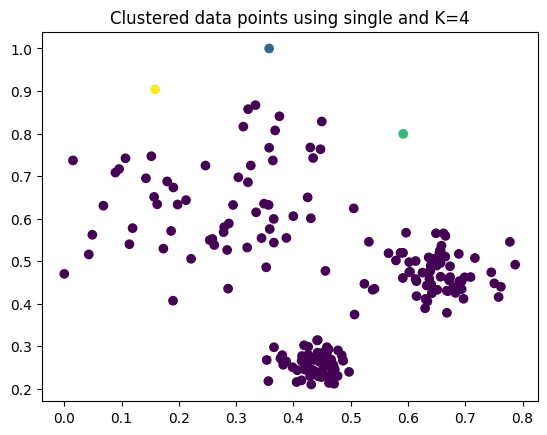

0.18521221676681696


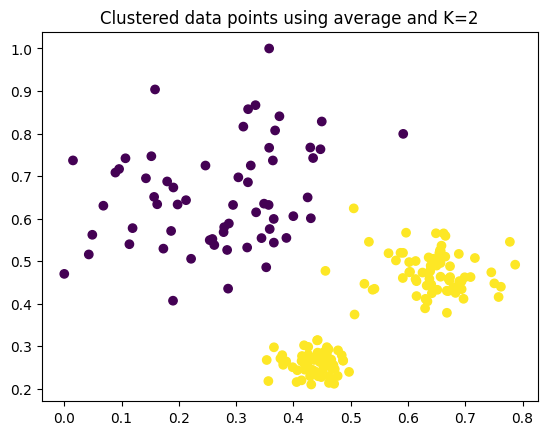

0.5412356976215418


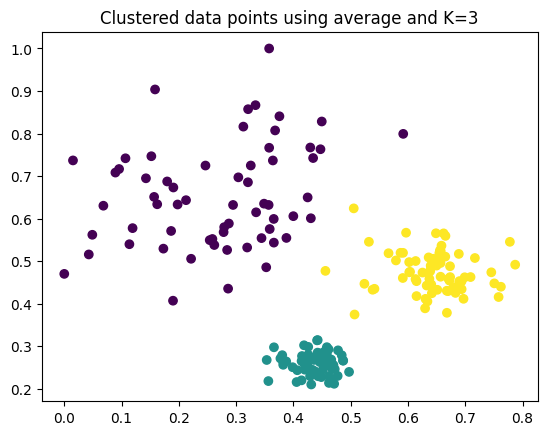

0.6512573361721159


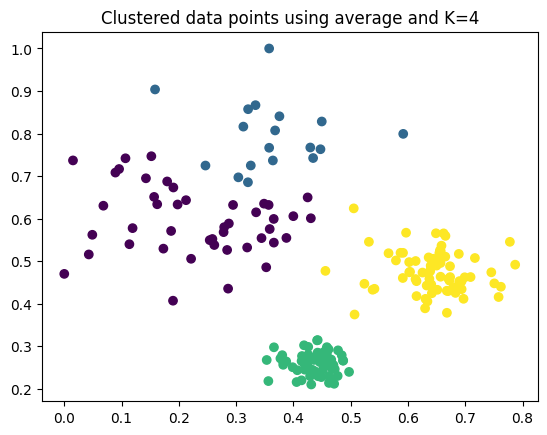

0.6269104137194254


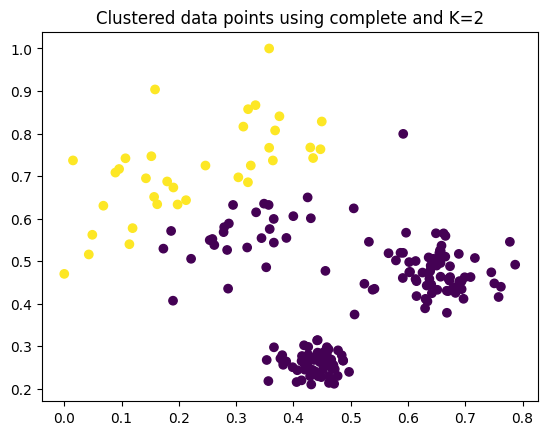

0.46543647635103835


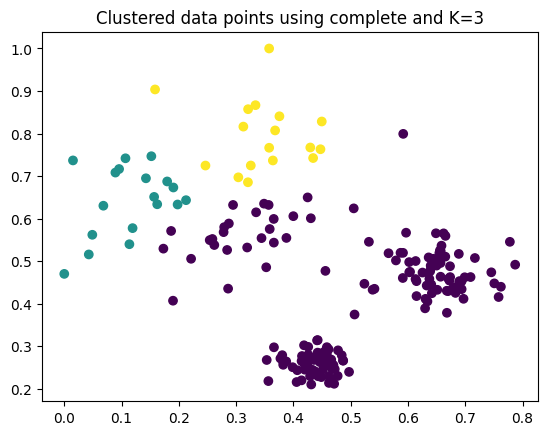

0.42070662088964594


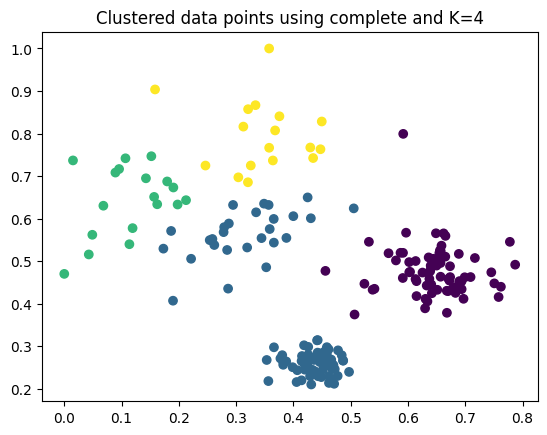

0.49018832117184474


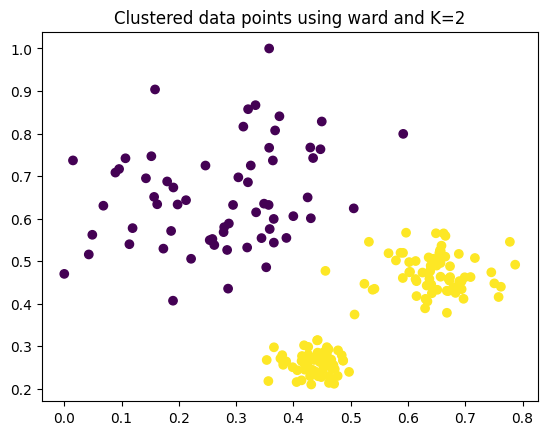

0.5411567916980019


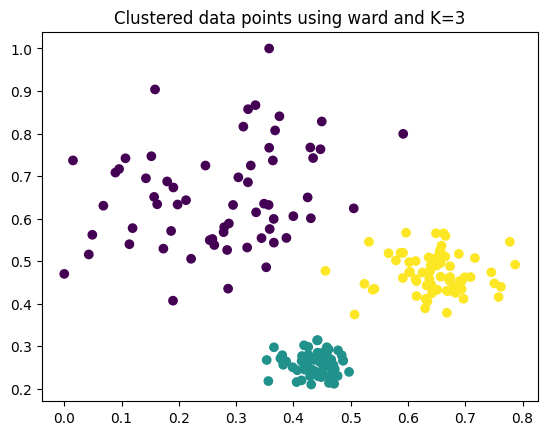

0.6509892268469648


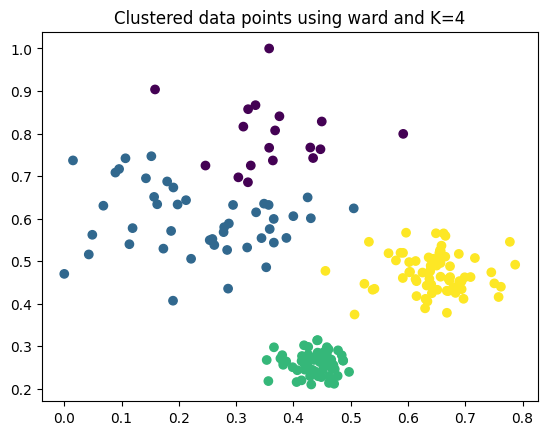

0.6250815214176803
[['single', (2, 0.3773294375309513), (3, 0.18045986668287203), (4, 0.18521221676681696)], ['average', (2, 0.5412356976215418), (3, 0.6512573361721159), (4, 0.6269104137194254)], ['complete', (2, 0.46543647635103835), (3, 0.42070662088964594), (4, 0.49018832117184474)], ['ward', (2, 0.5411567916980019), (3, 0.6509892268469648), (4, 0.6250815214176803)]]


In [135]:
# generate cluster images for different linkage types and number of clusters
scores = []
for m in ['single', 'average', 'complete', 'ward']:
  row = [m]
  for k in [2,3,4]:
    s = clusters(m, k)
    row.append((k,s))
  scores.append(row)
print(scores)